#Importing Modules

Kaggle Packages Import

In [1]:
# Install the Kaggle Python package
!pip install kaggle

# Create a directory for the Kaggle API configuration file
!mkdir ~/.kaggle

# Copy the Kaggle API key (kaggle.json) to the appropriate directory
!cp kaggle.json ~/.kaggle/

# Set the correct permissions for the kaggle.json file to keep it secure
!chmod 600 ~/.kaggle/kaggle.json

# Download the US Airline Flight Routes and Fares dataset from Kaggle
!kaggle datasets download bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024

# Unzip the downloaded dataset file
!unzip us-airline-flight-routes-and-fares-1993-2024.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/us-airline-flight-routes-and-fares-1993-2024
License(s): apache-2.0
 84% 11.0M/13.1M [00:01<00:00, 16.7MB/s]
100% 13.1M/13.1M [00:01<00:00, 11.1MB/s]
Archive:  us-airline-flight-routes-and-fares-1993-2024.zip
  inflating: US Airline Flight Routes and Fares 1993-2024.csv  


Import Working Modules

In [2]:
# Importing fundamental modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Import sklearn modules
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Data Loading and Preview

In [3]:
# Load original data & copy the raw data to df
df_raw = pd.read_csv("US Airline Flight Routes and Fares 1993-2024.csv")
df = df_raw.copy()

<ipython-input-3-75f15117df4b>:2: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("US Airline Flight Routes and Fares 1993-2024.csv")


In [4]:
df_raw

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,Table1a,2024,1,35412,31703,"Knoxville, TN","New York City, NY (Metropolitan Area)",15412,12953,TYS,...,278.70,DL,0.7503,287.44,AA,0.2359,248.46,NaN,NaN,202411541212953TYSLGA
245951,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,11697,TYS,...,148.69,G4,0.8255,114.45,G4,0.8255,114.45,NaN,NaN,202411541211697TYSFLL
245952,Table1a,2024,1,35412,32467,"Knoxville, TN","Miami, FL (Metropolitan Area)",15412,13303,TYS,...,330.19,AA,0.8057,321.92,AA,0.8057,321.92,NaN,NaN,202411541213303TYSMIA
245953,Table1a,2024,1,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,14112,TYS,...,95.65,G4,1.0000,95.65,G4,1.0000,95.65,NaN,NaN,202411541214112TYSPIE


In [5]:
# Display first few rows
df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [6]:
df.shape

(245955, 23)

# Data Pre-Processing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

## Data Cleaning

Here, we are removing columns that are ID labels. These columns are not relevant to our analysis as they do not represent continuous variables or informative categorical variables. The columns to be removed are:

- `tbl`
- `citymarketid_1`
- `citymarketid_2`
- `airportid_1`
- `airportid_2`
- `Geocoded_City1`
- `Geocoded_City2`
- `tbl1apk`

In [8]:
# List of columns to drop (i.e., not important to our analysis)
features_dropped = ['tbl',
                    'citymarketid_1',
                    'citymarketid_2',
                    'airportid_1',
                    'airportid_2',
                    'Geocoded_City1',
                    'Geocoded_City2',
                    'tbl1apk']
df = df.drop(columns=features_dropped)

Since we don't have a significant amount of null (less 1% of the entire dataset) values across the dataset, we will be deleting rows with NaN.

In [9]:
# Count the number of NaN values by column
df.isnull().sum()

,0
Year,0
quarter,0
city1,0
city2,0
airport_1,0
airport_2,0
nsmiles,0
passengers,0
fare,0
carrier_lg,1540


In [10]:
# Drop rows with NaN values
df.dropna()

,Year,quarter,city1,city2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
0,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43
1,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11
2,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44
3,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09
4,2021,3,"Albuquerque, NM","Phoenix, AZ",ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,2024,1,"Knoxville, TN","New York City, NY (Metropolitan Area)",TYS,LGA,665,207,278.70,DL,0.7503,287.44,AA,0.2359,248.46
245951,2024,1,"Knoxville, TN","Miami, FL (Metropolitan Area)",TYS,FLL,724,277,148.69,G4,0.8255,114.45,G4,0.8255,114.45
245952,2024,1,"Knoxville, TN","Miami, FL (Metropolitan Area)",TYS,MIA,724,70,330.19,AA,0.8057,321.92,AA,0.8057,321.92
245953,2024,1,"Knoxville, TN","Tampa, FL (Metropolitan Area)",TYS,PIE,550,178,95.65,G4,1.0000,95.65,G4,1.0000,95.65


In [11]:
df.describe()

,Year,quarter,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,244415.000000,244415.000000,244343.000000,244343.000000
mean,2008.524124,2.479153,1189.812319,299.476795,218.979587,0.665252,218.710963,0.450438,190.675939
std,8.703364,1.122149,703.143472,511.389486,82.372486,0.224635,84.674363,0.332669,73.577694
min,1993.000000,1.000000,109.000000,0.000000,50.000000,0.003800,50.000000,0.010000,50.000000
25%,2001.000000,1.000000,626.000000,21.000000,164.620000,0.480000,161.500000,0.158000,140.060000
50%,2008.000000,2.000000,1023.000000,113.000000,209.320000,0.652400,208.030000,0.360000,181.630000
75%,2016.000000,3.000000,1736.000000,339.000000,262.890000,0.871900,263.640000,0.750000,230.040000
max,2024.000000,4.000000,2724.000000,8301.000000,3377.000000,1.000000,2725.600000,1.000000,2725.600000


After reviewing the basic statistics of our continuous variables, we identified anomalies in the `passenger` column. For example, some flights reported having 0 passengers (with a minimum value of 0), while others recorded implausibly high numbers, with a maximum of 3,377 passengers. Given that the highest capacity of any commercial aircraft as of September 2024 is 853 passengers [Source](https://www.aviationjobsearch.com/career-hub/articles/career-advice/general/which-is-the-largest-passenger-plane-in-the-world), these figures suggest the presence of erroneous data.

Therefore, we decided to clean the dataset by removing rows where the passenger count is either 0 or exceeds 853. This step ensures that our analysis is based on accurate and realistic data.

In [12]:
# Constant defining the maximum passenger capacity for commercial aircraft
MAXIMUM_PASSENGER_CAPACITY = 853

# Remove rows where the passenger count is 0 or exceeds the maximum capacity
df = df[(df['passengers'] > 0) & (df['passengers'] <= MAXIMUM_PASSENGER_CAPACITY)]

In [13]:
df.shape

(215420, 15)

## Feature Engineering

Since the original dataset combines both cities and states to represent the departure and destination locations, we will create new features to separate these variables for more precise analysis. These new features will include:

- `departure_city`
- `departure_state`
- `destination_city`
- `destination_state`

This separation will enhance the clarity of our data for subsequent analyses.

In [14]:
# Extract the departure city and state from the 'city1' column
df["departure_city"] = df["city1"].str.split(",", expand=True)[0]
df["departure_state"] = df["city1"].str.split(",", expand=True)[1]

# Extract the destination city and state from the 'city2' column
df["destination_city"] = df["city2"].str.split(",", expand=True)[0]
df["destination_state"] = df["city2"].str.split(",", expand=True)[1]

# Delete the 'city1' and 'city2' columns
df = df.drop(columns=["city1", "city2"])

In [15]:
df

,Year,quarter,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,departure_city,departure_state,destination_city,destination_state
0,2021,3,ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43,Allentown/Bethlehem/Easton,PA,Tampa,FL (Metropolitan Area)
1,2021,3,ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11,Allentown/Bethlehem/Easton,PA,Tampa,FL (Metropolitan Area)
2,2021,3,ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44,Albuquerque,NM,Dallas/Fort Worth,TX
3,2021,3,ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09,Albuquerque,NM,Dallas/Fort Worth,TX
4,2021,3,ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77,Albuquerque,NM,Phoenix,AZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,2024,1,TYS,LGA,665,207,278.70,DL,0.7503,287.44,AA,0.2359,248.46,Knoxville,TN,New York City,NY (Metropolitan Area)
245951,2024,1,TYS,FLL,724,277,148.69,G4,0.8255,114.45,G4,0.8255,114.45,Knoxville,TN,Miami,FL (Metropolitan Area)
245952,2024,1,TYS,MIA,724,70,330.19,AA,0.8057,321.92,AA,0.8057,321.92,Knoxville,TN,Miami,FL (Metropolitan Area)
245953,2024,1,TYS,PIE,550,178,95.65,G4,1.0000,95.65,G4,1.0000,95.65,Knoxville,TN,Tampa,FL (Metropolitan Area)


`fare_per_mile`:
Here, we created a new feature called `fare_per_mile` by dividing the total fare of each flight by the distance traveled in miles (`nsmiles`). This feature provides a standardized measure of fare relative to the distance, which is useful for several reasons:

1. **Standardized variable** -> fare per mile allows us to make a direct comparison of the cost efficiency of different flights, regardless of the total distance traveled.

2. **Usefuly model feature (?)** -> lastly, including fare per mile as a feature in machine learning models could potentially improve the accuracy of predictions related to fare pricing since it's a more granular level of detail that can help models learn.

In [16]:
# Calculate fare per mile by dividing the fare by the distance in miles
df['fare_per_mile'] = df['fare'] / df['nsmiles']

In [17]:
# Display the first few rows
df['fare_per_mile']

,fare_per_mile
0,0.083948
1,0.215392
2,0.318207
3,0.314897
4,0.539970
...,...
245950,0.419098
245951,0.205373
245952,0.456064
245953,0.173909


## Data Transformation

In this step, we normalize the continuous variables `nsmiles`, `passengers`, `fare`, `fare_lg`, and `fare_low` (`large_ms` and `lf_ms` are already normalized) using MinMaxScaler. As such, normalization scales the values of these columns to a range of 0 to 1. This preprocessing step is crucial for several reasons:



*   Consistency in scale -> normalizing the data can help make all features contribute equally to our models and prevents features with larger ranges from dominating those with smaller ranges.


*   Improving our models performance -> distance-based algorithms like k-means clustering should perform better and converge faster when the data is normalized.

In [18]:
from sklearn.preprocessing import MinMaxScaler

df_normalized = df.copy()

# Columns to normalize
columns_to_normalize = ['nsmiles', 'passengers', 'fare', 'fare_lg', 'fare_low']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform selected columns
df_normalized[columns_to_normalize] = scaler.fit_transform(
    df_normalized[columns_to_normalize])


In [19]:
df_normalized

,Year,quarter,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,departure_city,departure_state,destination_city,destination_state,fare_per_mile
0,2021,3,ABE,PIE,0.329254,0.210094,0.027926,G4,1.0000,0.021378,G4,1.0000,0.025687,Allentown/Bethlehem/Easton,PA,Tampa,FL (Metropolitan Area),0.083948
1,2021,3,ABE,TPA,0.329254,0.021127,0.142707,DL,0.4659,0.116863,UA,0.1193,0.085276,Allentown/Bethlehem/Easton,PA,Tampa,FL (Metropolitan Area),0.215392
2,2021,3,ABQ,DAL,0.180115,0.238263,0.120768,WN,0.9968,0.092370,WN,0.9968,0.110144,Albuquerque,NM,Dallas/Fort Worth,TX,0.318207
3,2021,3,ABQ,DFW,0.180115,0.308685,0.119039,AA,0.9774,0.091440,AA,0.9774,0.109037,Albuquerque,NM,Dallas/Fort Worth,TX,0.314897
4,2021,3,ABQ,PHX,0.083748,0.465962,0.114061,WN,0.6061,0.092405,AA,0.3939,0.094836,Albuquerque,NM,Phoenix,AZ,0.539970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,2024,1,TYS,LGA,0.212620,0.241784,0.205517,DL,0.7503,0.163355,AA,0.2359,0.162633,Knoxville,TN,New York City,NY (Metropolitan Area),0.419098
245951,2024,1,TYS,FLL,0.235182,0.323944,0.088476,G4,0.8255,0.044135,G4,0.8255,0.052760,Knoxville,TN,Miami,FL (Metropolitan Area),0.205373
245952,2024,1,TYS,MIA,0.235182,0.080986,0.251870,AA,0.8057,0.187118,AA,0.8057,0.222862,Knoxville,TN,Miami,FL (Metropolitan Area),0.456064
245953,2024,1,TYS,PIE,0.168642,0.207746,0.040727,G4,1.0000,0.031178,G4,1.0000,0.037346,Knoxville,TN,Tampa,FL (Metropolitan Area),0.173909


In [20]:
# Select columns with numerical data types
numeric_df = df.select_dtypes(include=['int64', 'float64']).copy()

In [21]:
numeric_df

,Year,quarter,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low,fare_per_mile
0,2021,3,970,180,81.43,1.0000,81.43,1.0000,81.43,0.083948
1,2021,3,970,19,208.93,0.4659,219.98,0.1193,154.11,0.215392
2,2021,3,580,204,184.56,0.9968,184.44,0.9968,184.44,0.318207
3,2021,3,580,264,182.64,0.9774,183.09,0.9774,183.09,0.314897
4,2021,3,328,398,177.11,0.6061,184.49,0.3939,165.77,0.539970
...,...,...,...,...,...,...,...,...,...,...
245950,2024,1,665,207,278.70,0.7503,287.44,0.2359,248.46,0.419098
245951,2024,1,724,277,148.69,0.8255,114.45,0.8255,114.45,0.205373
245952,2024,1,724,70,330.19,0.8057,321.92,0.8057,321.92,0.456064
245953,2024,1,550,178,95.65,1.0000,95.65,1.0000,95.65,0.173909


In [22]:
# Select columns with continous data types
continous_df = numeric_df.drop(columns=['Year', 'quarter']).copy()

In [23]:
# Select columns with numerical data types
categorical_df = df.select_dtypes(include=['object']).copy()

In [24]:
categorical_df

,airport_1,airport_2,carrier_lg,carrier_low,departure_city,departure_state,destination_city,destination_state
0,ABE,PIE,G4,G4,Allentown/Bethlehem/Easton,PA,Tampa,FL (Metropolitan Area)
1,ABE,TPA,DL,UA,Allentown/Bethlehem/Easton,PA,Tampa,FL (Metropolitan Area)
2,ABQ,DAL,WN,WN,Albuquerque,NM,Dallas/Fort Worth,TX
3,ABQ,DFW,AA,AA,Albuquerque,NM,Dallas/Fort Worth,TX
4,ABQ,PHX,WN,AA,Albuquerque,NM,Phoenix,AZ
...,...,...,...,...,...,...,...,...
245950,TYS,LGA,DL,AA,Knoxville,TN,New York City,NY (Metropolitan Area)
245951,TYS,FLL,G4,G4,Knoxville,TN,Miami,FL (Metropolitan Area)
245952,TYS,MIA,AA,AA,Knoxville,TN,Miami,FL (Metropolitan Area)
245953,TYS,PIE,G4,G4,Knoxville,TN,Tampa,FL (Metropolitan Area)


# Exploratory Data Analysis

## Preliminary Analysis

In [25]:
df

,Year,quarter,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,departure_city,departure_state,destination_city,destination_state,fare_per_mile
0,2021,3,ABE,PIE,970,180,81.43,G4,1.0000,81.43,G4,1.0000,81.43,Allentown/Bethlehem/Easton,PA,Tampa,FL (Metropolitan Area),0.083948
1,2021,3,ABE,TPA,970,19,208.93,DL,0.4659,219.98,UA,0.1193,154.11,Allentown/Bethlehem/Easton,PA,Tampa,FL (Metropolitan Area),0.215392
2,2021,3,ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44,Albuquerque,NM,Dallas/Fort Worth,TX,0.318207
3,2021,3,ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09,Albuquerque,NM,Dallas/Fort Worth,TX,0.314897
4,2021,3,ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77,Albuquerque,NM,Phoenix,AZ,0.539970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245950,2024,1,TYS,LGA,665,207,278.70,DL,0.7503,287.44,AA,0.2359,248.46,Knoxville,TN,New York City,NY (Metropolitan Area),0.419098
245951,2024,1,TYS,FLL,724,277,148.69,G4,0.8255,114.45,G4,0.8255,114.45,Knoxville,TN,Miami,FL (Metropolitan Area),0.205373
245952,2024,1,TYS,MIA,724,70,330.19,AA,0.8057,321.92,AA,0.8057,321.92,Knoxville,TN,Miami,FL (Metropolitan Area),0.456064
245953,2024,1,TYS,PIE,550,178,95.65,G4,1.0000,95.65,G4,1.0000,95.65,Knoxville,TN,Tampa,FL (Metropolitan Area),0.173909


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'quarter'}>,
        <Axes: title={'center': 'nsmiles'}>],
       [<Axes: title={'center': 'passengers'}>,
        <Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'large_ms'}>],
       [<Axes: title={'center': 'fare_lg'}>,
        <Axes: title={'center': 'lf_ms'}>,
        <Axes: title={'center': 'fare_low'}>],
       [<Axes: title={'center': 'fare_per_mile'}>, <Axes: >, <Axes: >]],
      dtype=object)

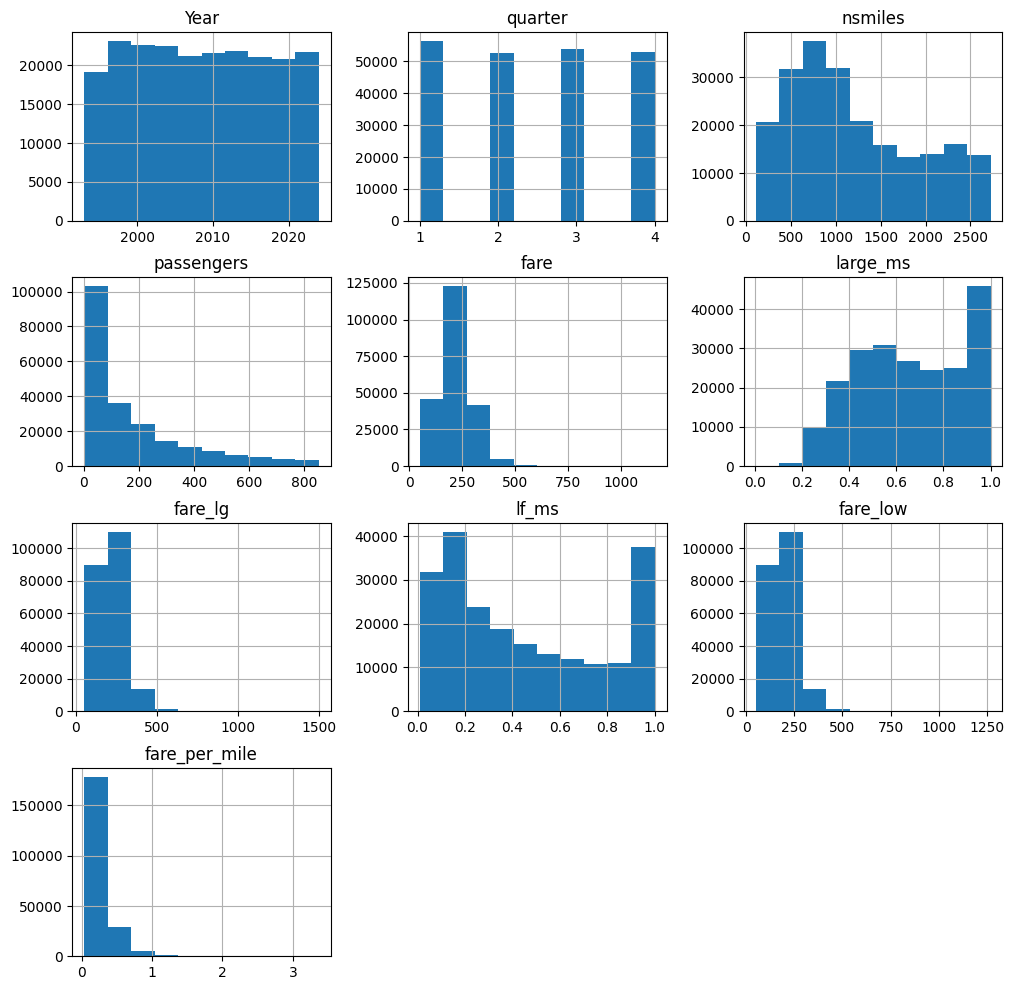

In [26]:
# Plot draft histograms for quick distribution analysis
numeric_df.hist(figsize=(12, 12))

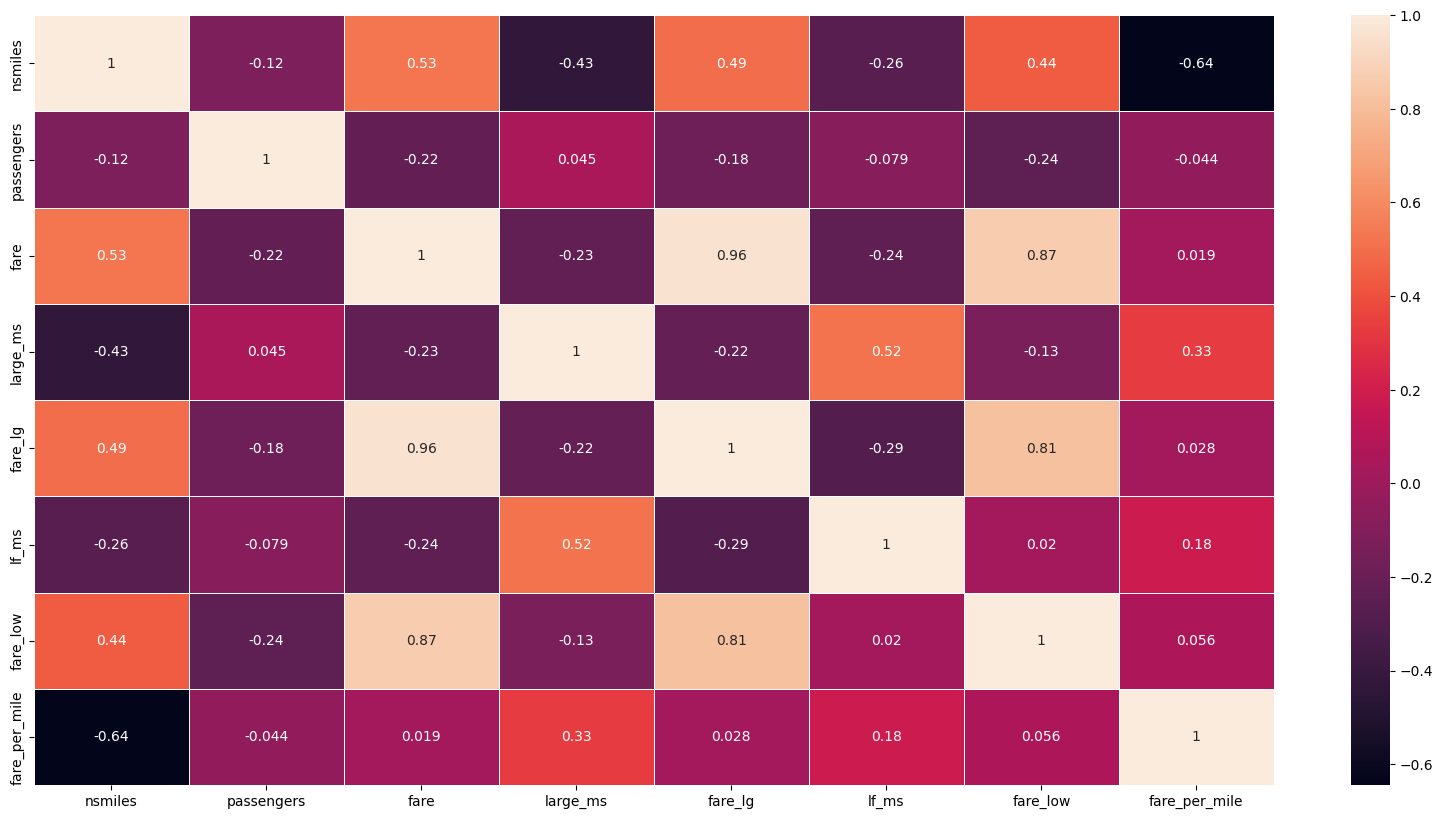

In [27]:
# Create correlation matrix
correlation_matrix = continous_df.corr()
plt.figure(figsize=(20, 10)) # Canvas size

# Generate heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.show() # Display plot

## Fare Analysis

Here, we visualize the trend of average fares, lowest fares, and fares of the largest carrier over the years. We start by grouping the data by year and calculating the mean values for `fare`, `fare_low`, and `fare_lg`. Three line plots are created to represent these different fare types.

Additionally, we highlight the years with the minimum and maximum average fares using red and green markers, respectively, and annotate these points for clarity. This should help us compare the trends of different fare types over time and hopefully provide more info into fare dynamics and market competition in the airline industry.


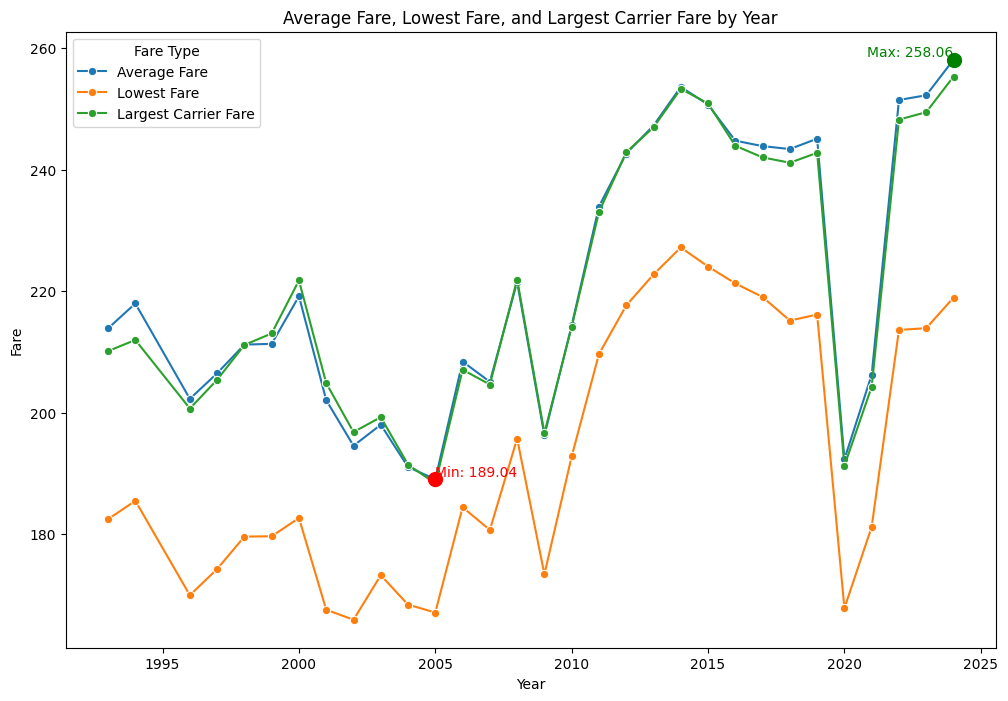

In [28]:
# Plotting the average fare, lowest fare, and largest carrier fare by year
plt.figure(figsize=(12, 8))

# Grouping the data by year and calculating the average fares
average_fare_by_year = df.groupby('Year')[['fare', 'fare_low', 'fare_lg']].mean().reset_index()

# Creating line plots for average fare, lowest fare, and largest carrier fare
sns.lineplot(x='Year', y='fare', data=average_fare_by_year, marker='o', label='Average Fare')
sns.lineplot(x='Year', y='fare_low', data=average_fare_by_year, marker='o', label='Lowest Fare')
sns.lineplot(x='Year', y='fare_lg', data=average_fare_by_year, marker='o', label='Largest Carrier Fare')

# displaying min and max points for average fare
min_fare_year = average_fare_by_year.loc[average_fare_by_year['fare'].idxmin()]
max_fare_year = average_fare_by_year.loc[average_fare_by_year['fare'].idxmax()]

plt.scatter(min_fare_year['Year'], min_fare_year['fare'], color='red', s=100, zorder=5)
plt.scatter(max_fare_year['Year'], max_fare_year['fare'], color='green', s=100, zorder=5)
plt.text(min_fare_year['Year'], min_fare_year['fare'], f"Min: {min_fare_year['fare']:.2f}", color='red', ha='left', va='bottom')
plt.text(max_fare_year['Year'], max_fare_year['fare'], f"Max: {max_fare_year['fare']:.2f}", color='green', ha='right', va='bottom')

# Adding titles and labels
plt.title('Average Fare, Lowest Fare, and Largest Carrier Fare by Year')
plt.xlabel('Year')
plt.ylabel('Fare')
plt.legend(title='Fare Type')

# Displaying the plot
plt.show()


## Airport & City Analysis

We created a bar plot to visualize the top 10 cities by total passenger count. This plot is meant to provides us a clear representation of the cities with the highest passenger traffic and potentially highligh the key hubs in the airline network.

<ipython-input-29-ef20359d4225>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passengers',


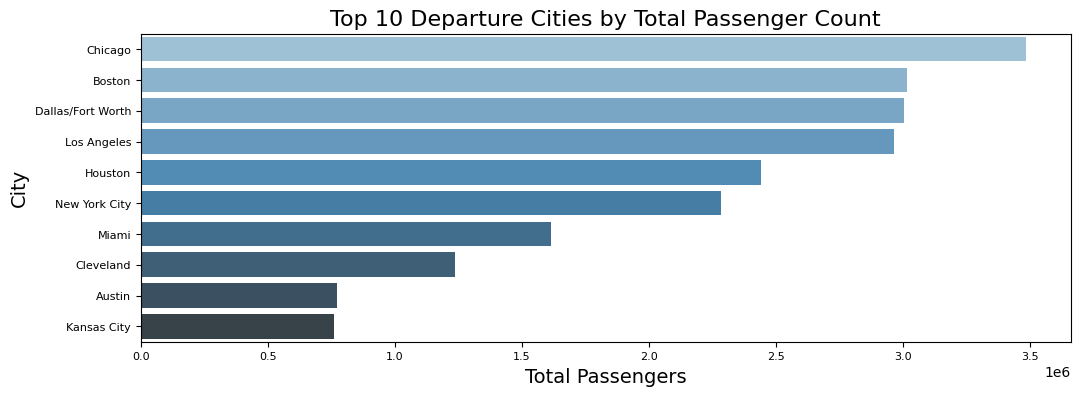

In [29]:
# Plotting the top 10 cities by passenger count
plt.figure(figsize=(12, 4))

# Grouping by city1 and summing the passengers, then selecting the top 10 cities
top_cities = df.groupby(
    'departure_city')['passengers'].sum().nlargest(10).reset_index()

# Creating a bar plot for the top 10 cities by passenger count
sns.barplot(x='passengers',
            y='departure_city',
            data=top_cities,
            palette='Blues_d')

# Adding titles and labels
plt.title('Top 10 Departure Cities by Total Passenger Count', fontsize=16)
plt.xlabel('Total Passengers', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Displaying the plot
plt.show()


<ipython-input-30-81166dbcccb3>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='passengers', y='airport_1', data=top_airports, palette='Blues_d')


<Figure size 1200x400 with 0 Axes>

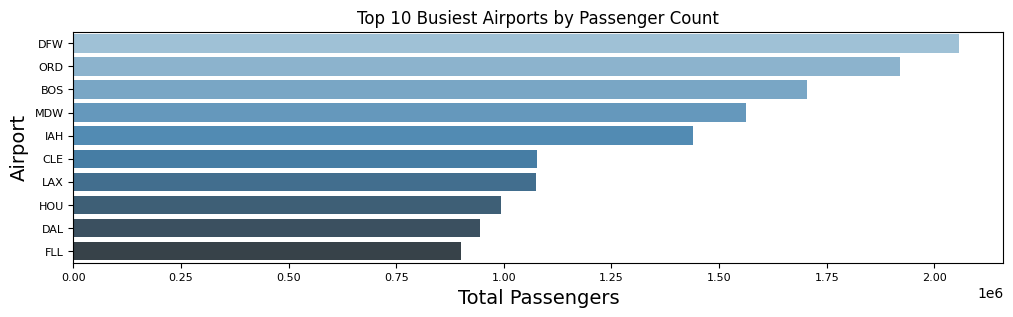

In [30]:
plt.figure(figsize=(12, 4))

# Group by airport_1 and airport_2 separately and sum passengers
airport1_passengers = df.groupby('airport_1')['passengers'].sum().reset_index()
airport2_passengers = df.groupby('airport_2')['passengers'].sum().reset_index()

# Concatenate the results
busiest_airports = pd.concat([airport1_passengers,
                              airport2_passengers], ignore_index=True)
busiest_airports = busiest_airports.groupby(
    'airport_1')['passengers'].sum().reset_index()

# Top 10 busiest airports
top_airports = busiest_airports.nlargest(10, 'passengers')

plt.figure(figsize=(12, 3))
sns.barplot(x='passengers', y='airport_1', data=top_airports, palette='Blues_d')
plt.title('Top 10 Busiest Airports by Passenger Count')
plt.xlabel('Total Passengers', fontsize=14)
plt.ylabel('Airport', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

## Market Share Analysis

<ipython-input-31-37a90ce33c4f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_carriers.values,


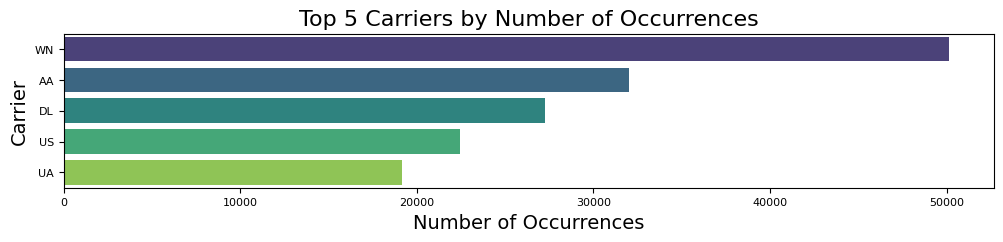

In [31]:
# Calculate the count of occurrences for each carrier in 'carrier_low'
carrier_counts = df.groupby('carrier_low')['carrier_low'].count().sort_values(
    ascending=False)

# Select the top 5 carriers
top_10_carriers = carrier_counts.head(5)

# Plot the top 5 carriers
plt.figure(figsize=(12, 2))
sns.barplot(x=top_10_carriers.values,
            y=top_10_carriers.index,
            palette='viridis')

# Add titles and labels
plt.title('Top 5 Carriers by Number of Occurrences', fontsize=16)
plt.xlabel('Number of Occurrences', fontsize=14)
plt.ylabel('Carrier', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Display the plot
plt.show()


In [32]:
# Defining Southwestern Airlines's dataset
df_southwestern = df[df['carrier_low'] == 'WN']
df_southwestern

,Year,quarter,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,departure_city,departure_state,destination_city,destination_state,fare_per_mile
2,2021,3,ABQ,DAL,580,204,184.56,WN,0.9968,184.44,WN,0.9968,184.44,Albuquerque,NM,Dallas/Fort Worth,TX,0.318207
5,2021,3,ABQ,BOS,1974,153,324.97,AA,0.4263,323.73,WN,0.1609,298.20,Albuquerque,NM,Boston,MA (Metropolitan Area),0.164625
6,2021,3,ABQ,MHT,1974,16,315.90,WN,0.7285,270.42,WN,0.7285,270.42,Albuquerque,NM,Boston,MA (Metropolitan Area),0.160030
7,2021,3,ABQ,PVD,1974,22,329.22,WN,0.5415,271.60,WN,0.5415,271.60,Albuquerque,NM,Boston,MA (Metropolitan Area),0.166778
8,2021,3,ABQ,BWI,1670,159,255.89,WN,0.7212,244.89,WN,0.7212,244.89,Albuquerque,NM,Washington,DC (Metropolitan Area),0.153228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245929,2024,1,SLC,OAK,599,576,171.02,WN,0.6131,158.81,WN,0.6131,158.81,Salt Lake City,UT,San Francisco,CA (Metropolitan Area),0.285509
245931,2024,1,SLC,SJC,599,453,216.03,DL,0.6746,240.82,WN,0.3103,164.12,Salt Lake City,UT,San Francisco,CA (Metropolitan Area),0.360651
245932,2024,1,SLC,TPA,1888,457,343.86,DL,0.5245,412.68,WN,0.2244,251.96,Salt Lake City,UT,Tampa,FL (Metropolitan Area),0.182129
245937,2024,1,SRQ,DCA,880,197,220.34,AA,0.8341,223.78,WN,0.0832,154.41,Sarasota/Bradenton,FL,Washington,DC (Metropolitan Area),0.250386


In [33]:
# Defining American Airline's dataset
df_american = df[df['carrier_low'] == 'AA']
df_american

,Year,quarter,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,departure_city,departure_state,destination_city,destination_state,fare_per_mile
3,2021,3,ABQ,DFW,580,264,182.64,AA,0.9774,183.09,AA,0.9774,183.09,Albuquerque,NM,Dallas/Fort Worth,TX,0.314897
4,2021,3,ABQ,PHX,328,398,177.11,WN,0.6061,184.49,AA,0.3939,165.77,Albuquerque,NM,Phoenix,AZ,0.539970
12,2021,3,ABQ,ORD,1121,206,241.25,AA,0.6869,229.41,AA,0.6869,229.41,Albuquerque,NM,Chicago,IL,0.215210
15,2021,3,ABQ,EWR,1861,77,342.13,UA,0.3845,382.33,AA,0.3324,296.40,Albuquerque,NM,New York City,NY (Metropolitan Area),0.183842
16,2021,3,ABQ,HPN,1861,3,356.92,DL,0.6154,358.24,AA,0.3462,350.22,Albuquerque,NM,New York City,NY (Metropolitan Area),0.191789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245948,2024,1,TYS,HPN,665,5,332.42,AA,0.7442,310.57,AA,0.7442,310.57,Knoxville,TN,New York City,NY (Metropolitan Area),0.499880
245949,2024,1,TYS,JFK,665,8,280.76,AA,0.5658,254.62,AA,0.5658,254.62,Knoxville,TN,New York City,NY (Metropolitan Area),0.422195
245950,2024,1,TYS,LGA,665,207,278.70,DL,0.7503,287.44,AA,0.2359,248.46,Knoxville,TN,New York City,NY (Metropolitan Area),0.419098
245952,2024,1,TYS,MIA,724,70,330.19,AA,0.8057,321.92,AA,0.8057,321.92,Knoxville,TN,Miami,FL (Metropolitan Area),0.456064


In [34]:
# Defining Delta Airlines's dataset
df_delta = df[df['carrier_low'] == 'DL']
df_delta

,Year,quarter,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,departure_city,departure_state,destination_city,destination_state,fare_per_mile
26,2021,3,ABQ,LGB,677,12,201.28,WN,0.5636,187.75,DL,0.1182,180.77,Albuquerque,NM,Los Angeles,CA (Metropolitan Area),0.297312
83,2021,3,DFW,ECP,685,172,191.07,AA,0.9034,191.39,DL,0.0663,182.69,Dallas/Fort Worth,TX,Panama City,FL,0.278934
85,2021,3,DFW,VPS,641,424,184.18,AA,0.9726,184.37,DL,0.0195,169.47,Dallas/Fort Worth,TX,Valparaiso,FL,0.287332
90,2021,3,DAL,EWR,1428,5,219.33,DL,1.0000,219.33,DL,1.0000,219.33,Dallas/Fort Worth,TX,New York City,NY (Metropolitan Area),0.153592
91,2021,3,DAL,HPN,1428,1,230.18,DL,1.0000,230.18,DL,1.0000,230.18,Dallas/Fort Worth,TX,New York City,NY (Metropolitan Area),0.161190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245877,2024,1,PNS,IAD,846,24,295.13,DL,0.5467,273.50,DL,0.5467,273.50,Pensacola,FL,Washington,DC (Metropolitan Area),0.348853
245888,2024,1,PDX,DCA,2358,297,356.80,AS,0.6262,377.66,DL,0.1017,365.55,Portland,OR,Washington,DC (Metropolitan Area),0.151315
245889,2024,1,PDX,IAD,2358,103,390.01,UA,0.5897,407.33,DL,0.1902,378.08,Portland,OR,Washington,DC (Metropolitan Area),0.165399
245904,2024,1,PWM,IAD,493,42,270.50,UA,0.9689,272.34,DL,0.0104,214.72,Portland,ME,Washington,DC (Metropolitan Area),0.548682


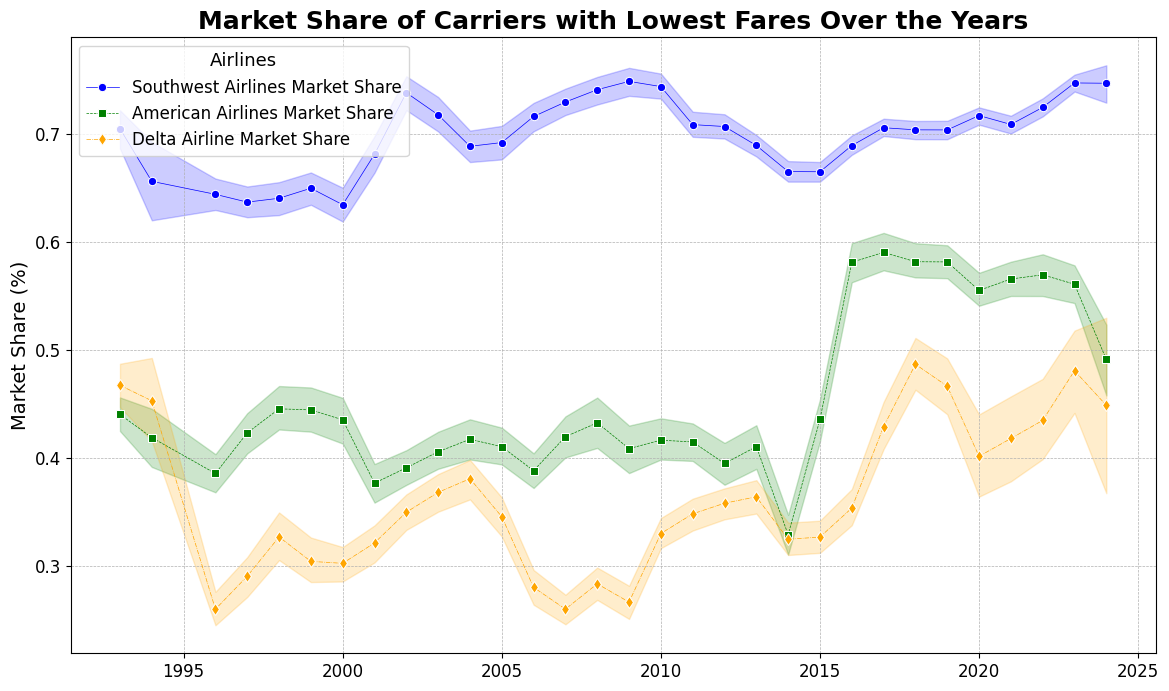

In [35]:
plt.figure(figsize=(14, 8))

# Plotting market share for each airline with distinct styles
sns.lineplot(x='Year', y='large_ms', data=df_southwestern,
             label='Southwest Airlines Market Share',
             linewidth=.5, marker='o', color='blue')
sns.lineplot(x='Year', y='lf_ms', data=df_american,
             label='American Airlines Market Share',
             linestyle='--',
             linewidth=.5,
             marker='s',
             color='green')
sns.lineplot(x='Year', y='lf_ms', data=df_delta,
             label='Delta Airline Market Share',
             linestyle='-.',
             linewidth=.5,
             marker='d',
             color='orange')

# Adding a title and labels
plt.title('Market Share of Carriers with Lowest Fares Over the Years',
          fontsize=18, fontweight='bold')
plt.xlabel('', fontsize=14)
plt.ylabel('Market Share (%)', fontsize=14)

# Enhancing the legend
plt.legend(title='Airlines',
           title_fontsize='13',
           fontsize='12',
           loc='upper left')

# Customizing the grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5)

# Adjusting tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()


In this plot, we aim to compare the market share of different airlines over the years. We plot the market share data for Southwest Airlines, American Airlines, and Delta Airlines.

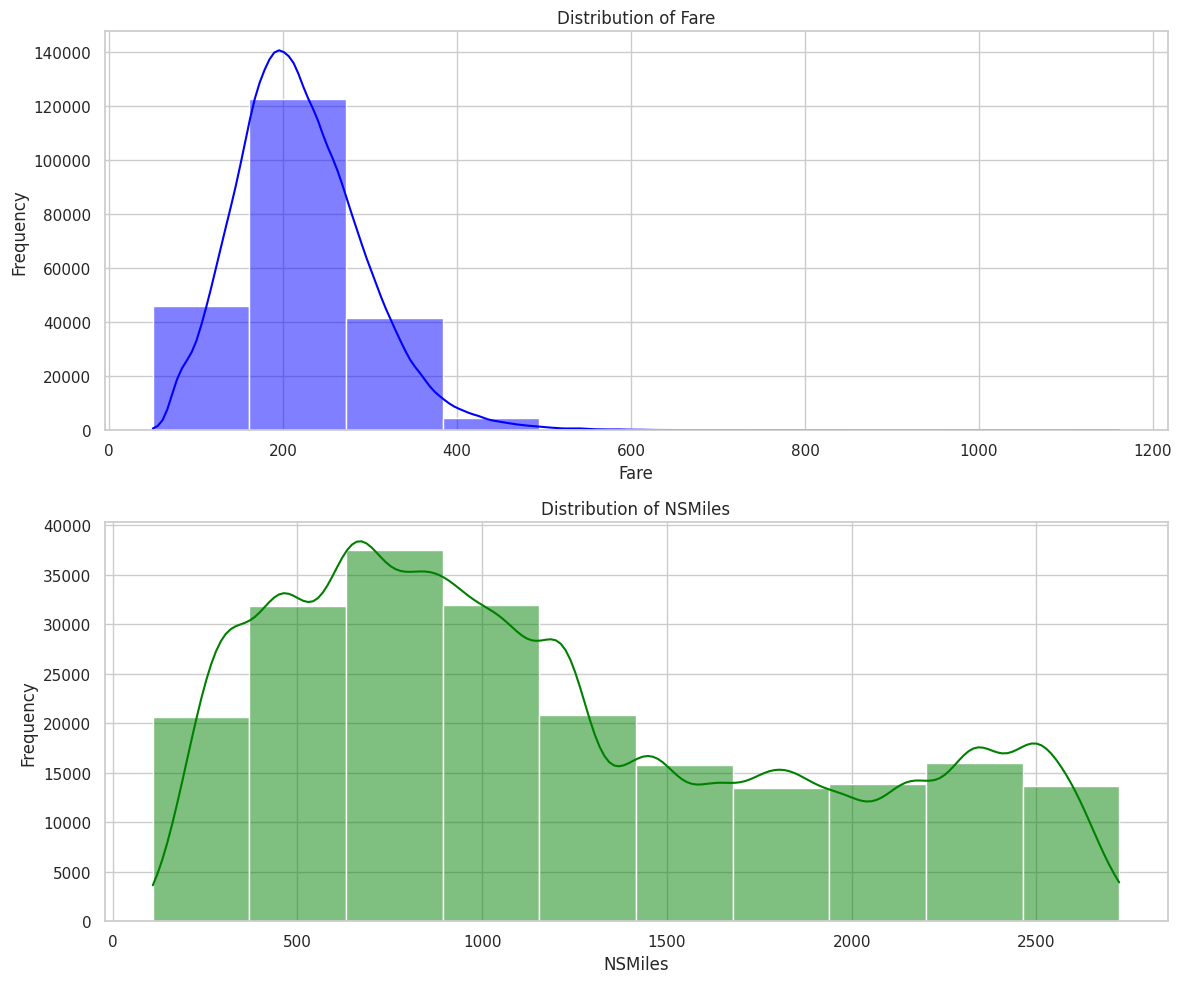

In [36]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create subplots for both fare and nsmiles
fig, axes = plt.subplots(2, 1, figsize=(12, 10)) # Adjusted to 2 rows, 1 column

# Histogram for fare
sns.histplot(df['fare'], bins=10, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of Fare')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Frequency')

# Histogram for nsmiles
sns.histplot(df['nsmiles'], bins=10, kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of NSMiles')
axes[1].set_xlabel('NSMiles')
axes[1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

## Fare Inflation Rate Analysis

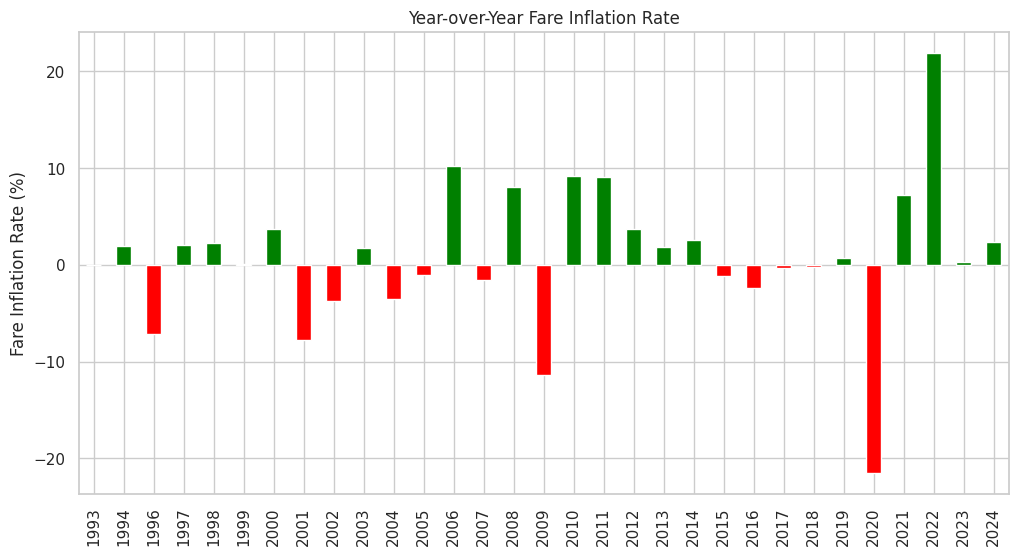

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
# Calculate the annual average fare for each year
annual_avg_fare = df.groupby('Year')['fare'].mean().reset_index()

# Rename the column to indicate this is the annual average fare
annual_avg_fare.rename(columns={'fare': 'annual_avg_fare'}, inplace=True)

# Calculate the year-over-year fare inflation rate
annual_avg_fare['fare_inflation_rate'] = annual_avg_fare[
    'annual_avg_fare'].pct_change() * 100

# Display the results
annual_avg_fare[['Year', 'annual_avg_fare', 'fare_inflation_rate']]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Use different colors for positive and negative inflation rates
colors = ['green' if x >= 0 else 'red' for x in annual_avg_fare[
    'fare_inflation_rate']]

annual_avg_fare.plot(
    x='Year',
    y='fare_inflation_rate',
    kind='bar',
    ax=ax,
    color=colors,
    legend=False
)

# Add titles and labels
ax.set_title('Year-over-Year Fare Inflation Rate')
ax.set_xlabel('')
ax.set_ylabel('Fare Inflation Rate (%)')

# Display the plot
plt.show()


Here, we calculate and analyze the annual average fare and fare inflation rate over the years. We start by grouping the dataset by `Year` and calculating the mean fare for each year to obtain the annual average fare. This helps us understand the general trend in fare pricing over time.

We then calculate the year-over-year fare inflation rate by determining the percentage change in the average fare from the previous year. This is achieved using the `pct_change` function, which computes the percentage change between the current and prior element. Multiplying by 100 converts this rate into a percentage.

Finally, we display the results by printing the `Year`, `annual_avg_fare`, and `fare_inflation_rate` columns. This output allows us to observe the average fare for each year and the corresponding year-over-year inflation rate.

Comparing to historical data: [Source](https://www.usinflationcalculator.com/inflation/airfare-inflation/)

# Machine Learning Models

## Fare Prediction Model

<ipython-input-43-5f50dad393ef>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_southwestern.dropna(inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression:
Test R-squared: 0.7162
Mean Absolute Error: 28.7250
Mean Squared Error: 1433.7908
Root Mean Squared Error: 37.8654



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Decision Tree Regressor:
Test R-squared: 0.9961
Mean Absolute Error: 1.9102
Mean Squared Error: 19.4800
Root Mean Squared Error: 4.4136



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest Regressor:
Test R-squared: 0.9982
Mean Absolute Error: 0.9718
Mean Squared Error: 9.3234
Root Mean Squared Error: 3.0534

Best model: Random Forest Regressor with R-squared: 0.9982


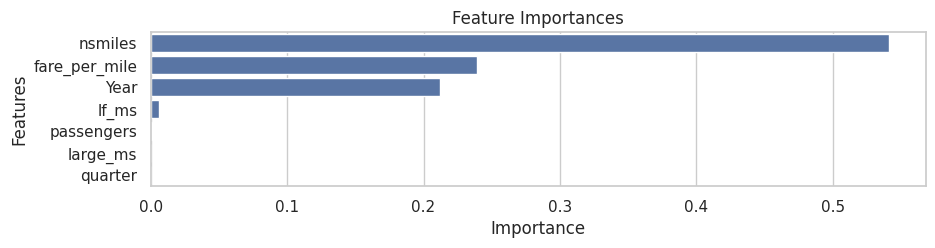

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Data for Southwestern Airlines flights
df_southwestern.dropna(inplace=True)

# Relevant columns for analysis
df_southwestern = df_southwestern[['Year',
                                   'quarter',
                                   'nsmiles',
                                   'passengers',
                                   'fare',
                                   'large_ms',
                                   'lf_ms',
                                   'fare_per_mile']]

# Defining features (X) and target (y)
X = df_southwestern.drop(['fare'], axis=1)
y = df_southwestern['fare']  # Target variable 'fare'

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=24)

# Dictionary of models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=24),
    'Random Forest Regressor': RandomForestRegressor(random_state=24),
}

best_score = 0
best_model_name = None
best_model = None

# Train and evaluate each model
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = model.predict(X_test)

    # Performance metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Print results
    print(f'{name}:')
    print(f'Test R-squared: {r2:.4f}')
    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Root Mean Squared Error: {rmse:.4f}\n')

    # Checking if this model has the best performance so far
    if r2 > best_score:
        best_score = r2
        best_model_name = name
        best_model = model

# Print best model's name & its R-squared
print(f'Best model: {best_model_name} with R-squared: {best_score:.4f}')

# If the best model is a tree-based model, plot the feature importances
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_

    # Get the feature names
    feature_names = X_train.columns if hasattr(X_train, 'columns') else [
    'Feature ' + str(i) for i in range(X_train.shape[1])
]

    # Creating a dataframe for feature importances
    feature_importances_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
        }).sort_values('Importance', ascending=False)

    # Plotting feature importances
    plt.figure(figsize=(10, 2))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
    plt.title('Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()
else:
    print("The best model does not support feature importances.")


<ipython-input-44-87ced342c15f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',


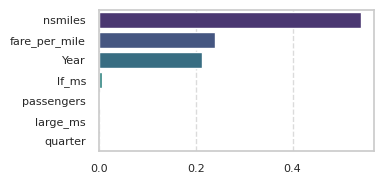

In [44]:
# Plotting feature importances
plt.figure(figsize=(4, 2))  # Increased size for better visibility
sns.barplot(x='Importance',
            y='Feature',
            data=feature_importances_df,
            palette='viridis')

# Adding titles and labels for clarity
plt.title('', fontsize=12)
plt.xlabel('', fontsize=10)
plt.ylabel('', fontsize=10)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Clustering (K-Means)

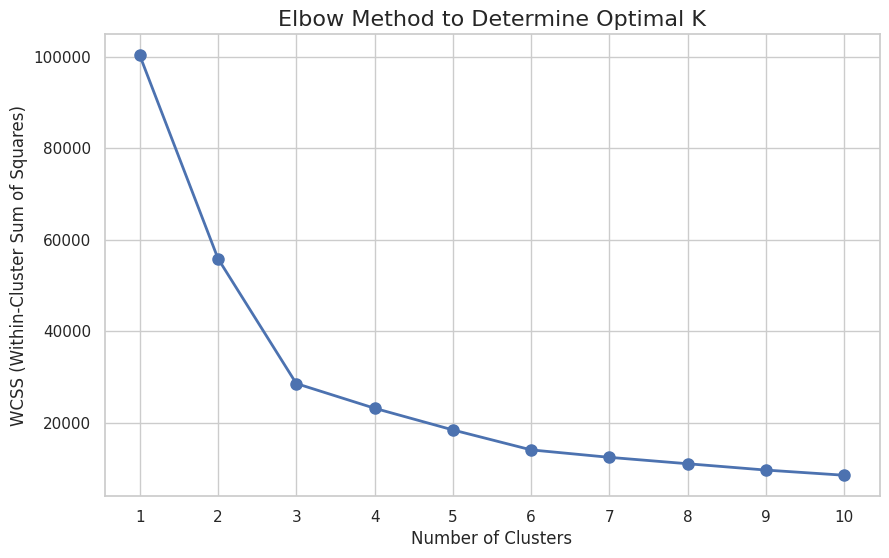

<ipython-input-45-1f958ead4ebf>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_southwestern_normalized['cluster'] = kmeans.fit_predict(X_kmeans_scaled)


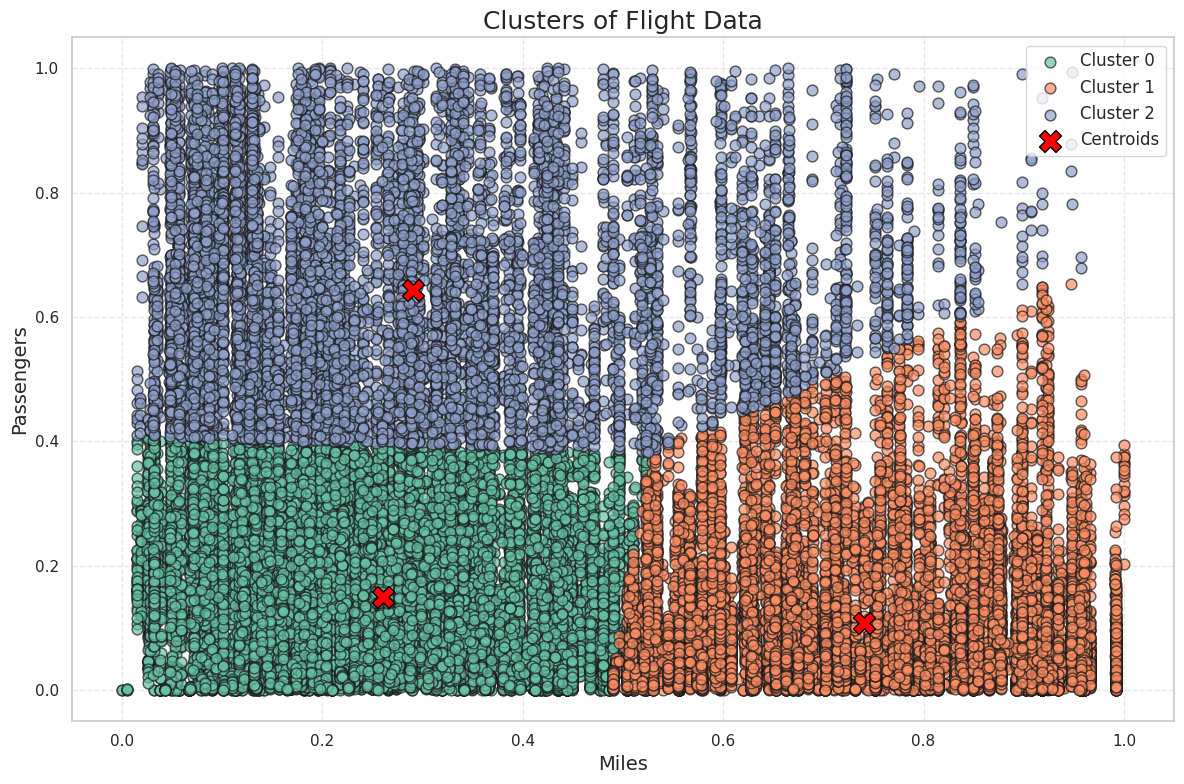

In [45]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get Southwestern Airlines normalized df
df_southwestern_normalized = df_normalized[df_normalized['carrier_low'] == 'WN']

var_1 = 'nsmiles'
var_2 = 'passengers'

# Seaborn style
sns.set(style="whitegrid")

# Selecting features for KMeans
kmeans_features = ['nsmiles', 'passengers']
X_kmeans = df_southwestern_normalized[kmeans_features]

# Scale the features
scaler = StandardScaler()
X_kmeans_scaled = scaler.fit_transform(X_kmeans)

# Determine optimal k using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=24)
    kmeans.fit(X_kmeans_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b', linewidth=2, markersize=8)
plt.title('Elbow Method to Determine Optimal K', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# k based on the elbow method plot
optimal_k = 3

# Apply KMeans with chosen k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=24)
df_southwestern_normalized['cluster'] = kmeans.fit_predict(X_kmeans_scaled)

# Transform centroids back to original scale
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

# Plot clusters
plt.figure(figsize=(12, 8))

# color palette
palette = sns.color_palette("Set2", optimal_k)

# Plot each cluster with a different color
for i in range(optimal_k):
    plt.scatter(
        df_southwestern_normalized[df_southwestern_normalized[
            'cluster'] == i][var_1],
        df_southwestern_normalized[df_southwestern_normalized[
            'cluster'] == i][var_2],
        s=60,
        c=[palette[i]],
        label=f'Cluster {i}',
        edgecolors='k',
        alpha=0.7  # transparency
    )

# Plot the centroids
plt.scatter(
    centroids_original[:, kmeans_features.index(var_1)],
    centroids_original[:, kmeans_features.index(var_2)],
    s=250,
    c='red',
    marker='X',
    label='Centroids',
    edgecolors='black',
    linewidths=1
)

# Set plot titles and labels with better fonts and sizes
plt.title('Clusters of Flight Data', fontsize=18)
plt.xlabel('Miles', fontsize=14)
plt.ylabel('Passengers', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()
